In [1]:
import pandas as pd
import numpy as np
import time

## Part A: Model Code

1. Write a function to calculate and return the Euclidean distance of two vectors.

In [41]:
def Eucillidean_Distance(row1, row2):
    Euc_D = np.sqrt(np.sum((row1-row2)**2))
    return Euc_D

2. Write a function to calculate and return the Manhattan distance of two vectors

In [42]:
def Manhatten_Distance (row1,row2):
    return np.sum(np.absolute(row1 - row2))

3. Write a function to calculate and return the accuracy and generalization error of two vectors.

In [43]:
def accuracy_and_error (a, b):
    TP, TN , FP , FN = confusion_matrix(a,b)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    error = 1- accuracy 
    return (accuracy, error)

4. Write three functions to compute: precision, recall and F1 score.

In [44]:
def precision(a, b):
    TP, TN , FP , FN = confusion_matrix(a,b)
    if TP + FP == 0:
        return 0 
    else: 
        return TP / (TP + FP)
    
def recall(a, b):
    TP, TN , FP , FN = confusion_matrix(a,b)
    if TP + FN == 0:
        return 0
    else:
        return TP / (TP + FN)
def F1Score(a,b):
    TP, TN , FP , FN = confusion_matrix(a,b)
    return (TP)/(TP+((FN+FP)/2))

5. Write a function to compute the confusion matrix of two vectors

In [45]:
def confusion_matrix(a, b):
    #A = predicted , b = truth label 
    TP = 0 
    TN = 0
    FP = 0 
    FN = 0 
    z = 0 
    while z <= (len(a)-1):
        if a[z] == 0 and b[z] == 0:
            TN += 1
        elif a[z] == 0 and b[z] == 1:
            FN += 1
        elif a[z] == 1 and b[z] == 0:
            FP += 1
        elif a[z] == 1 and b[z] == 1:
            TP += 1
        z += 1
    return TP, TN , FP , FN 

6. Write a function to generate the Receiver Operating Characteristic (ROC) curve. 

In [46]:
def ROC_Curve (a,b):
    Roc_Curves = {}
    for values in a:
        y_pred, y_test, y_prob = a[values]
        roc_point = []
        for threshold in b:
            New_predict = predict_threshold(y_prob,threshold)
            TPR = recall(New_predict, y_test)
            FPR = FalsePostiveRate(New_predict, y_test)
            roc_point.append([FPR, TPR])
        Roc_Curves[values] = roc_point
    return Roc_Curves

7. Write a function to compute area under curve (AUC) for the ROC curve

In [47]:
def Area_Under_Curve(a):
    Auc_values = []
    for values in a:
        b = a[values]
        AUC = 0
        i = 0
        while i <= (len(b)-2):
            P1 = b[i]
            P2 = b[i+1]
            X_P1 = P1[0]
            Y_P1 = P1[1]
            X_P2 = P2[0]
            Y_P2 = P2[1]
            Triangle = (((Y_P1 - Y_P2)* (X_P1 - X_P2))/2)
            Rectangle = (Y_P2 * (X_P1 - X_P2))
            AUC += (Triangle + Rectangle)
            i += 1
        Auc_values.append(AUC)
    return Auc_values

8. Write a function to generate the precision-recall curve

In [48]:
def Precision_Recall_Curve (a, b):
    PR_Curves = {}
    for values in a:
        y_pred, y_test, y_prob = a[values]
        PR_point = []
        for threshhold in b:
            y_prediction = predict_threshold(y_prob,threshhold)
            Prec = precision(y_prediction , y_test)
            Recall = recall (y_prediction , y_test)
            PR_point.append ([Recall,Prec])
        PR_Curves[values] = PR_point
    return PR_Curves

9. implement a KNN_Classifier model class. It should have the following three methods.

In [49]:
class KNN_Classifier(): 
    def fit(self,X,y,n_neighbor,weights):#kwargss):
        self.y = y # 1D targer vector
        self.X = X # Data Matrix containing all features excluding the targe
        self.n_neighbors = n_neighbor
        self.weights = weights
    def predict(self,X):
        if self.weights == "uniform":
            print("Uniform")
            x_test, x_train, y_test, y_train = partition (X,self.y,0.8)

            x_train = x_train.to_numpy()

            x_test = x_test.to_numpy()

            y_train = y_train.to_numpy()    
            y_test = y_test.to_numpy()
            y_test = y_test.astype(np.int)      
            y_train = y_train.astype(np.int)


            num_test = x_test.shape[0]
            num_train = x_train.shape[0]
            distances = np.zeros((num_test,num_train))
            for i in range(num_test):
                for j in range(num_train):
                    distances[i,j] = Eucillidean_Distance(x_test[i,:],x_train[j,:])
            predict_test = distances.shape[0]
            y_pred = np.zeros(predict_test)
            y_prob = np.zeros(predict_test)

            if self.n_neighbors == 1:
                y_distances = np.argsort(distances)[:self.n_neighbors]
                y_indicies = (np.argsort(distances)[self.n_neighbors])
                k_closes_classes = y_train_[y_indicies]
                y_pred = k_closes_classes
                y_prob = k_closes_classes
            else:
                y_distances = np.sort(distances)
                y_indicies = np.argsort(distances)
                for t in range(num_test):

                    k_closes_classes = y_train[y_indicies[t,:self.n_neighbors]]

                    y_pred[t] = np.argmax(np.bincount((k_closes_classes)))
                    if y_pred[t] == 1.0:
                        number_of_values = (np.bincount(k_closes_classes == 1)[1])
                        y_prob[t] = number_of_values / self.n_neighbors

                    else:
                        number_of_values = (np.bincount(k_closes_classes == 0)[0])
                        y_prob[t] = number_of_values / self.n_neighbors
            return y_pred, y_test, y_prob
        else:
            print("distance")
            X = shuffle.drop(labels='new quality_1', axis=1)
            x_test, x_train, y_test, y_train = partition (X,self.y,0.2)

            x_train = x_train.to_numpy()
            x_test = x_test.to_numpy()

            y_train = y_train.to_numpy()    
            y_test = y_test.to_numpy()
            y_test = y_test.astype(np.int)      
            y_train = y_train.astype(np.int)


            num_test = x_test.shape[0]
            num_train = x_train.shape[0]
            distances = np.zeros((num_test,num_train))
            for i in range(num_test):
                for j in range(num_train):
                    distances[i,j] = Eucillidean_Distance(x_test[i,:],x_train[j,:])
                    
            
            predict_test = distances.shape[0]
            y_pred = np.zeros(predict_test)
            y_prob = np.zeros(predict_test)
            y_distances_ = (np.sort(distances))
            y_indicies = (np.argsort(distances))
            for t in range(num_test):
                freq1_Eu = 0
                freq2_Eu = 0
                k_closes_classes = y_train[y_indicies[t,:self.n_neighbors]]
                                            
                for z in range ((len(k_closes_classes))):
                    if k_closes_classes[z] == 0:
                        freq1_Eu += 1/y_distances_[z,t]
                    else:
                        freq2_Eu += 1/y_distances_[t,z]
                            
                if np.sum(freq1_Eu) > np.sum(freq2_Eu):
                    y_pred[t] = 0
                else:
                    y_pred[t] = 1
                y_prob [t] = freq2_Eu / (freq1_Eu + freq2_Eu )
            return y_pred, y_test, y_prob
        
#I've made this extra method, in order to do part Correctly. This is the same overall means of answering as 
#the regular predict method, but instead there is an extra loop in there that will be used to run through the 
#different number of folds avaiable. 
    def predict_folds(self, X, num_folds):
        if self.weights == "uniform":
            print ("Uniform")
            Stored_dictionary_Euic = {}
            Stored_dictionary_Ma = {}
            for i in range(num_folds): 
                #because the folds don't change no matter how many times you recall this function
                #I can just re use it each fold, and just take a different version of it from 
                # the features and labels
                print(i)
                features, labels =  folds(X,self.y,num_folds)
                x_test = features[i]
                del features[i]
                x_train = pd.concat(features)
                y_test = labels[i]
                del labels[i]
                y_train = pd.concat(labels)
                #Above code is used to get the different fold into the specific training and test values

                #had to confert these to arrays because some of the later on code wasn't working well

                x_train = x_train.to_numpy()
                x_test = x_test.to_numpy()
                y_train = y_train.to_numpy()
                y_test = y_test.to_numpy()

                y_train = y_train.astype(np.int)
                y_test = y_test.astype(np.int)

                num_test = x_test.shape[0]
                num_train = x_train.shape[0]
                # These were created in order to put their values in a specific spot so that 
                #i can recall their index's to figure out the actual value from the training labels

                distances_Eu = np.zeros((num_test,num_train))
                distances_Ma = np.zeros((num_test,num_train))
                for a in range(num_test):
                    for j in range(num_train):
                        distances_Eu[a,j] = Eucillidean_Distance(x_test[a,:],x_train[j,:])
                        distances_Ma[a,j] = Manhatten_Distance(x_test[a,:],x_train[j,:])
                y_pred_Eu = np.zeros(num_test)
                y_pred_Ma = np.zeros(num_test)
                y_prob_Eu = np.zeros(num_test)
                y_prob_Ma = np.zeros(num_test)
                y_distances_Eu = (np.sort(distances_Eu))
                y_distances_Ma = (np.sort(distances_Ma))
                y_indicies_Eu = np.argsort(distances_Eu)
                y_indicies_Ma = np.argsort(distances_Ma)
                for z in range(num_test):
                    k_closes_classes_Eu = y_train[y_indicies_Eu[z, :self.n_neighbors]].astype(int)
                    k_closes_classes_Ma = y_train[y_indicies_Ma[z,:self.n_neighbors]].astype(int)

                    y_pred_Eu[z] = np.argmax(np.bincount(k_closes_classes_Eu))
                    y_pred_Ma[z] = np.argmax(np.bincount(k_closes_classes_Ma))
                    #I can use this to calculate the prediction just because the bianry is 
                    #0's and 1's i am calculating the probability of getting 1 everytime which is 
                    # just the sum of 1 / by the number of values within that instance
                    y_prob_Eu[z] = (np.mean(k_closes_classes_Eu))

                    y_prob_Ma[z] = (np.mean(k_closes_classes_Ma))
                #We then store that value into a dictionary which has within it the prediction, 
                #the labels, as well as the prob for 1.

                Stored_dictionary_Ma [i] = y_pred_Ma ,y_test, y_prob_Ma
                Stored_dictionary_Euic [i] = y_pred_Eu,y_test, y_prob_Eu



                # Then it returns both values for both Euic as well as Ma. Although it was said that
                # we decdied what we wanted earlier. I left this in because it asked for it to test
                #Both values and to see if antyhing changes because of it. 
            return Stored_dictionary_Euic, Stored_dictionary_Ma
        else:
            print("Distance")
            Stored_dictionary_Euic = {}
            Stored_dictionary_Ma = {}
            #Same thing as the other function above just with weight on the distance.
            for i in range(num_folds):  
                print(i)
                features, labels =  folds(X,self.y,num_folds)
                x_test = features[i]
                del features[i]
                x_train = pd.concat(features)
                y_test = labels[i]
                del labels[i]
                y_train = pd.concat(labels)


                x_train = x_train.to_numpy()
                x_test = x_test.to_numpy()
                y_train = y_train.to_numpy()
                y_test = y_test.to_numpy()

                y_train = y_train.astype(np.int)
                y_test = y_test.astype(np.int)


                num_test = x_test.shape[0]
                num_train = x_train.shape[0]


                distances_Eu = np.zeros((num_test,num_train))
                distances_Ma = np.zeros((num_test,num_train))

                for a in range(num_test):
                    for j in range(num_train):
                        distances_Eu[a,j] = Eucillidean_Distance(x_test[a,:],x_train[j,:])
                        distances_Ma[a,j] = Manhatten_Distance(x_test[a,:],x_train[j,:])





                predict_test = distances_Eu.shape[0]
                y_pred_Eu = np.zeros(predict_test)
                y_prob_Eu = np.zeros(predict_test)
                y_pred_Ma = np.zeros(predict_test)
                y_prob_Ma = np.zeros(predict_test)

                y_distances_Eu = (np.sort(distances_Eu))
                y_indicies_Eu = (np.argsort(distances_Eu))

                y_distances_Ma = (np.sort(distances_Ma))
                y_indicies_Ma = (np.argsort(distances_Ma))

                # a loop to calculate the weight for each instance. 

                for z in range(num_test):
                    k_closes_classes_Eu = y_train[y_indicies_Eu[z,:self.n_neighbors]]
                    k_closes_classes_Ma = y_train[y_indicies_Ma[z,:self.n_neighbors]]
                    freq1_Eu = 0
                    freq2_Eu = 0
                    freq1_Ma = 0
                    freq2_Ma = 0
                    #it looks for each value in the K neighbors labels, i can now figures out 
                    # which value to add to which varriable defined as freq 1 freq2. 
                    # freq 1 is the sum of 0 for that k neighbors, and freq 2 is the sum
                    # of 1 for that neighbor. 
                    for t in range((len(k_closes_classes_Ma))):
                        if k_closes_classes_Ma[t] == 0:
                            freq1_Ma += 1/ y_distances_Ma[z,t]
                        else:
                            freq2_Ma += 1/ y_distances_Ma[z,t]

                        if k_closes_classes_Eu[t] == 0:
                            freq1_Eu += 1/y_distances_Eu[z,t]
                        else:
                            freq2_Eu += 1/y_distances_Eu[z,t]
                    #then you decide which is larger, and you can then put the prediction down
                    #based upon the values of those freq1 and freq2. 
                    if np.sum(freq1_Eu) > np.sum(freq2_Eu):
                        y_pred_Eu[z] = 0
                    else:
                        y_pred_Eu[z] = 1

                    if np.sum(freq1_Ma) > np.sum(freq2_Ma):
                        y_pred_Ma[z] = 0
                    else:
                        y_pred_Ma[z] = 1
                    y_prob_Eu [z] = freq2_Eu / (freq1_Eu + freq2_Eu )
                    y_prob_Ma [z] = freq2_Ma / (freq1_Ma + freq2_Ma )


                Stored_dictionary_Euic [i] = y_pred_Eu,y_test ,y_prob_Eu
                Stored_dictionary_Ma [i] = y_pred_Ma, y_test, y_prob_Ma
            return Stored_dictionary_Euic, Stored_dictionary_Ma
    
    
    def __init__(self):
        pass
    def __init__(self):
        
        pass



10. Read in the winequality-white.csv file as a Pandas data frame. 

In [205]:
import pandas as pd
import numpy as np
df = pd.read_csv('winequality-white.csv', sep=";")

11. The target will be the “quality” column which represents rating of wine and ranges from 3 to 8. You will need to convert it into a two-category variable consisting of “good” (quality > 5) & “bad” (quality <= 5). Your target vector should have 0s (representing “bad” quality wine) and 1s (representing “good” quality wine). 

In [206]:
df.loc[df['quality'] > 5, 'new quality'] = '1'
df.loc[df['quality'] <= 5, 'new quality'] = '0'

12. Use the techniques from the first recitation to summarize each of the variables in the dataset in terms of mean, standard deviation, and quartiles. Include this in your report.

In [207]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


13.Shuffle the rows of your data. You can use def = df.sample(frac=1) as an idiomatic way to shuffle the data in Pandas without losing column names

In [208]:
df = df.sample(frac=1)

In [209]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

In [210]:
for col in df.columns:
    if df[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(df[col].value_counts())


Column Name: new quality
1    3258
0    1640
Name: new quality, dtype: int64


In [211]:
category_df = df.select_dtypes(['object'])
dummy_df = pd.get_dummies(category_df)
dummy_df['new quality'] = df['new quality']
df = pd.get_dummies(df)

14. Generate pair plots using the seaborn package. This will be used to identify and report the redundant features, if there is any

In [ ]:
### i did take this from the workbooks.
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

15. Drop the redundant features

In [19]:
df = df.drop(labels=['new quality_0','quality'], axis = 1) 
most_correlated = df.corr().abs()['new quality_1'].sort_values(ascending=False)
most_correlated1 = most_correlated[:6]
df = df.loc[:,most_correlated1.index]
df = df.drop_duplicates(keep= 'first')
## i ended up dropping every value that wasn't within the top 6 spot of correlation, just because 
## of how low those corelations were, they were below 0.1 almost reaching 0. 
## but i ddin't drop any based upon the pairs plot just becuase no one value was exactly the same as the other

In [20]:
shuffle = df
y = shuffle['new quality_1'] # 1D targer vector
X = shuffle.drop(labels='new quality_1', axis=1)
X_standardize = X.apply(lambda x: (x - x.mean(axis = 0) ) / (np.std(x)))

In [21]:
shuffle.describe()

,new quality_1,alcohol,density,volatile acidity,chlorides,total sulfur dioxide
count,3938.000000,3938.000000,3938.000000,3938.000000,3938.000000,3938.000000
mean,0.659726,10.590299,0.993788,0.280387,0.045923,137.160361
std,0.473861,1.215643,0.002900,0.103227,0.023160,43.019883
min,0.000000,8.000000,0.987110,0.080000,0.009000,9.000000
25%,0.000000,9.500000,0.991613,0.210000,0.035000,106.000000
50%,1.000000,10.400000,0.993490,0.260000,0.042000,133.000000
75%,1.000000,11.400000,0.995707,0.330000,0.050000,166.000000
max,1.000000,14.200000,1.038980,1.100000,0.346000,440.000000


16. Write a function named “partition” to split your data into trainingand test set. The function should take 3 arguments:

In [22]:
def partition (data,targ_vector,t):
    test_lengths = int(t * len(data))
    x_test = data[:test_lengths]
    y_test = data[test_lengths:]
    x_train = targ_vector[:test_lengths]
    y_train = targ_vector[test_lengths:]
    return x_test,y_test,x_train,y_train

In [23]:
model_args= {0:confusion_matrix,
             1:precision,
             2: recall, 
             3: F1Score,
             4: accuracy_and_error} 

17. Naively run your KNN_Classifier model on the trainingdataset with n_neighbors = 5 and using Euclidean distance.

In [24]:

start = time.time()
n_neighbor = 5
weights = "uniform"
KNN = KNN_Classifier ()
KNN.fit(X,y,n_neighbor, weights)
y_pred , y_test ,y_prob = KNN.predict(X)

model_args= {0:confusion_matrix,
             1:precision,
             2: recall, 
             3: F1Score,
             4: accuracy_and_error} 

unstandardized = {}
x = 0
while x <= (len(model_args)-1):
    Euclidean = model_args[x](y_pred, y_test)
    unstandardized[x] = Euclidean
    x += 1
unstandardized   

end = time.time()
print({end - start})

Uniform
{20.598909616470337}


a. Use accuracy and F1 score to compare your predictions to the expected labels

In [25]:
print ("F1 Score:",unstandardized[3])

F1 Score: 0.7475270843146491


b. Now standardize each feature of your training set (subtract mean and divide by standard deviation). Use the mean and standard deviation values for each feature in the training set to scale the test data

In [26]:
X_standardize = X.apply(lambda x: (x - x.mean(axis = 0) ) / (np.std(x)))

c. Re-run the KNN_Classifier model on the standardized data, find the accuracy and F1 score with the expected labels.

In [27]:
start = time.time()

n_neighbor = 5
weights = "uniform"
KNN = KNN_Classifier ()
KNN.fit(X_standardize,y,n_neighbor, weights)
y_pred, y_test, y_prob = KNN.predict(X_standardize)

model_args= {0:confusion_matrix,
             1:precision,
             2: recall, 
             3: F1Score,
             4: accuracy_and_error} 

standardized = {}
x = 0
while x <= (len(model_args)-1):
    Euclidean = model_args[x](y_pred, y_test)
    standardized[x] = Euclidean
    x += 1
    
standardized
end = time.time()
print({end - start})

Uniform
{20.288357496261597}


d. Compare the two accuracy values and the F1 scores; and decide whether you should use standardized data or unscaled data for the remainder of the assignment. This will describedin the report

In [28]:
print ("Comparing the unstandardized to standardized", unstandardized[3], standardized[3])

Comparing the unstandardized to standardized 0.7475270843146491 0.791453785415699


In [29]:
print("Comapring the accuracy values from unstandardized to standardized",unstandardized[4], standardized[4] )

Comapring the accuracy values from unstandardized to standardized (0.6596825396825396, 0.34031746031746035) (0.714920634920635, 0.28507936507936504)


## The decision being made is to use standardized values, because it produced a better F1 score as well as was more accurate compared to non standadrdized. 

e. Perform a similar test for inverse distance weighting in the KNN_Classifier model and determine whether or not to use it. This will go in the report.

In [280]:
start = time.time()
X_standardize = X.apply(lambda x: (x - x.mean(axis = 0) ) / (np.std(x)))
n_neighbor = 5
weights = "distance"
KNN = KNN_Classifier ()
KNN.fit(X_standardize,y,n_neighbor, weights)
y_pred, y_test, y_prob = KNN.predict(X_standardize)

model_args= {0:confusion_matrix,
             1:precision,
             2: recall, 
             3: F1Score,
             4: accuracy_and_error} 

standardized_weight = {}
x = 0
while x <= (len(model_args)-1):
    Euclidean = model_args[x](y_pred, y_test)
    standardized_weight[x] = Euclidean
    x += 1
    
standardized_weight
end = time.time()
print({end - start})

distance
{23.627888202667236}


In [276]:
model_args= {0:confusion_matrix,
             1:precision,
             2: recall, 
             3: F1,
             4: accuracy_and_error} 

In [281]:
print("The weight either uniform or distance using standardized weight",standardized[3], standardized_weight[3])

The weight either uniform or distance using standardized weight 0.7904717853839038 0.7896389324960753


In [282]:
print("The weight either uniform or distance using standardized weight",standardized[4], standardized_weight[4])

The weight either uniform or distance using standardized weight (0.7123809523809523, 0.28761904761904766) (0.6594663278271918, 0.34053367217280817)


### The decision is to not use weights because they preform better.

In [77]:
X_standardize

,alcohol,density,volatile acidity,chlorides,total sulfur dioxide
1513,0.501792,-0.030828,-0.585335,-0.645247,0.552052
4748,-1.059523,1.942157,0.574937,0.177271,1.085403
2244,-1.388221,1.346474,0.768315,-0.125762,2.105725
4600,-0.319953,-0.375153,-0.585335,-0.125762,-0.491459
2856,1.159188,-1.359924,-0.972093,-0.515376,-0.190001
...,...,...,...,...,...
869,-0.402127,-0.409586,-0.391957,-0.385504,-0.932053
3902,0.666141,-1.029371,-0.585335,4.246571,-1.674106
4378,-1.470396,0.396136,0.333213,-0.212343,-0.259568
2411,-1.141698,2.314029,-0.101889,-0.039181,1.641942


b. Use a helper function to calculate an s-partition of the data (i.e., partition the data into s equally sized portions)

In [52]:
def folds (X, y, s):
    features = np.array_split(X,s)
    labels = np.array_split(y,s)
    return features, labels

In [69]:
different_values = {}

In [71]:
model_arg = dict(n_neighbor = 11, weights ="uniform")
different_values[0] = model_arg

model_arg = dict(n_neighbor = 9, weights ="uniform")
different_values[1] = model_arg

model_arg = dict(n_neighbor = 5, weights ="uniform")
different_values[2] = model_arg

model_arg = dict(n_neighbor = 1, weights ="uniform")
different_values[3] = model_arg

model_arg = dict(n_neighbor = 11, weights ="distance")
different_values[4] = model_arg

model_arg = dict(n_neighbor = 9, weights ="distance")
different_values[5] = model_arg

model_arg = dict(n_neighbor = 5, weights ="distance")
different_values[6] = model_arg

model_arg = dict(n_neighbor = 1, weights ="distance")
different_values[7] = model_arg

In [72]:
model_args= {0:confusion_matrix,
             1:precision,
             2: recall, 
             3: F1Score,
             4: accuracy_and_error} 

18. Evaluation of an estimator performance via cross-validation: Implement the S-fold cross-validation function.

In [73]:
def sFold(k, X, y, model, model_args, model_arg, error_function):
    KNN = KNN_Classifier()
    KNN.fit(X, y, **model_arg)
    Stored_dictionary_EU, Stored_dictionary_Ma = KNN.predict_folds(X,k)
    x_fold= {}
    every_case = {}
    i = 0
    while i <= (len(Stored_dictionary_EU)-1):
        y_predEU, y_testEU, y_probEU = Stored_dictionary_EU[i]
        y_predMa, y_testMa, y_probMa = Stored_dictionary_Ma[i]
        x = 0
        while x <= (len(model_args)-1):
            Euclidean = np.round(model_args[x](y_predEU, y_testEU),4)
            Manhatten = np.round(model_args[x](y_predMa, y_testMa),4)
            x_fold[x] = Euclidean, Manhatten
            x += 1
        every_case[i] = x_fold
        i += 1
    return Stored_dictionary_EU, Stored_dictionary_Ma, every_case

In [ ]:
Number_of_Neighrbos = [1,5,9,11]
weights = ["uniform","distance"]
for neighbor in Number_of_Neighrbos:
    for values in weights:
        Dictionary_EU, Dictionary_Ma, Error = sFold(5, X_standardize, y, KNN_Classifier(),model_args,F1,neighbor,values)
        Euclidean_F1 = 0
        Manhattan_F1 = 0
        for values in Error:
            F1_Score = Error[values][3]
            Euclidean_F1 += F1_Score[0]
            Manhattan_F1 += F1_Score[1]
        F1_Eu = ((np.sum(Euclidean_F1))/5)
        F1_Ma = ((np.sum(Manhattan_F1))/5)
        print("number of neighbors:",neighbor, "weight:", values, "F1 Score of Euclidean and Manhattan", F1_Eu, F1_Ma)

19. Use your sfold function to evaluate the performance of your model over each combination of k and distance metrics from the following sets

#### below are the different versions of k, with a uniform distance. 

In [68]:
start = time.time()
x_test, x_train, y_test, y_train = partition (X,y,0.2)
model_args= {0:confusion_matrix,
             1:precision,
             2: recall, 
             3: F1Score,
             4: accuracy_and_error} 

K_11_Stored_dictionary_EU, K_11_Stored_dictionary_Ma, K_11_Error = sFold(5, x_train, y_train, 
                                                                         KNN_Classifier(),
                                                                         model_args,different_values[0],
                                                                         F1Score)
end = time.time()
print({end - start})

Uniform
0
1
2
3
4
{117.3985481262207}


In [74]:
start = time.time()
x_test, x_train, y_test, y_train = partition (X,y,0.2)
model_args= {0:confusion_matrix,
             1:precision,
             2: recall, 
             3: F1Score,
             4: accuracy_and_error} 


K_9_Stored_dictionary_EU, K_9_Stored_dictionary_Ma, K_9_Err = sFold(5, x_train, y_train,
                                                                    KNN_Classifier(), 
                                                                    model_args,different_values[1], 
                                                                    F1Score )
end = time.time()
print({end - start})

Uniform
0
1
2
3
4
{117.21690011024475}


In [75]:
start = time.time()
model_args= {0:confusion_matrix,
             1:precision,
             2: recall, 
             3: F1Score,
             4: accuracy_and_error} 
K_5_Stored_dictionary_EU, K_5_Stored_dictionary_Ma, K_5_Err= sFold(5, x_train, y_train,
                                                                    KNN_Classifier(), 
                                                                    model_args,  different_values[2],
                                                                    F1Score)
end = time.time()
print({end - start})

Uniform
0
1
2
3
4
{116.58805179595947}


In [76]:

start = time.time()
model_args= {0:confusion_matrix,
             1:precision,
             2: recall, 
             3: F1Score,
             4: accuracy_and_error} 

K_1_Stored_dictionary_EU, K_1_Stored_dictionary_Ma, K_1_Err =  sFold(5, x_train, y_train,
                                                                    KNN_Classifier(), 
                                                                    model_args, different_values[3],
                                                                    F1Score)
end = time.time()
print({end - start})

Uniform
0
1
2
3
4
{116.264155626297}


#### Below are the different variations of K, with a weighted distance. 

In [77]:

model_args= {0:confusion_matrix,
             1:precision,
             2: recall, 
             3: F1Score,
             4: accuracy_and_error}  

start = time.time()
K_11_weight_Stored_dictionary_EU, K_11_weight_Stored_dictionary_Ma, K_11_weight_Err =  sFold(5, x_train, y_train,
                                                                                             KNN_Classifier(),
                                                                                             model_args,different_values[4],
                                                                                             F1Score)
end = time.time()
print({end - start})




Distance
0
1
2
3
4
{116.41165256500244}


In [78]:
start = time.time()

model_args= {0:confusion_matrix,
             1:precision,
             2: recall, 
             3: F1Score,
             4: accuracy_and_error}  
K_9_weight_Stored_dictionary_EU, K_9_weight_Stored_dictionary_Ma, K_9_weight_Err = sFold(5,x_train, y_train,
                                                                                         KNN_Classifier(),
                                                                                         model_args,different_values[5],
                                                                                         F1Score)
end = time.time()
print({end - start})

Distance
0
1
2
3
4
{116.40304398536682}


In [79]:
start = time.time()

model_args= {0:confusion_matrix,
             1:precision,
             2: recall, 
             3: F1Score,
             4: accuracy_and_error} 
K_5_Weight_Stored_dictionary_EU, K_5_Weight_Stored_dictionary_Ma, K_5_Weight_Err = sFold(5, x_train, y_train, KNN_Classifier(),
                                                                                         model_args, different_values[6],F1Score) 
end = time.time()
print({end - start})

Distance
0
1
2
3
4
{118.87799310684204}


In [81]:
start = time.time()
model_args= {0:confusion_matrix,
             1:precision,
             2: recall, 
             3: F1Score,
             4: accuracy_and_error} 

K_1_weight_Stored_dictionary_EU, K_1_weight_Stored_dictionary_Ma, K_1_weight_Err = sFold(5, x_train, y_train, KNN_Classifier(),
                                                                                         model_args, different_values[7],F1Score)
end = time.time()
print({end - start})

Distance
0
1
2
3
4
{116.98287534713745}


In [82]:
total_errors = [K_1_weight_Err,K_5_Weight_Err,K_9_weight_Err,K_11_weight_Err,K_1_Err,K_5_Err,K_9_Err,K_11_Error]

In [85]:
Average_F1_error = {}
i = 0
for values in total_errors:
    F1_Eu = 0
    F1_Ma = 0
    for value in values:
        Error = values[value]
        F1= Error[3]
        F1_Eu += F1[0]
        F1_Ma += F1[1] 
    F1_Eu = np.round((F1_Eu / 5),4)
    F1_Ma = np.round((F1_Ma / 5),4)
    Average_F1_error[i] = F1_Eu, F1_Ma
    i+=1



## This is the average F1_ error scores the intervals are k[1,5,9,11] and the split is weighted and none weighted. The euclidean distance , manhattan distance.

iii. Calculate the average error (for all partitions) using the error_function on stored expected and predicted labels for all 

In [86]:
Average_F1_error 

{0: (0.7157, 0.722),
 1: (0.7455, 0.7491),
 2: (0.7461, 0.7497),
 3: (0.7568, 0.7559),
 4: (0.7157, 0.722),
 5: (0.7681, 0.7678),
 6: (0.7518, 0.7509),
 7: (0.7491, 0.7644)}

### It would appear that the K = 11, weight = "uniform", folds = 5, using the Manhattan distance metric. 

## Below are the Proformance Measures 
for the different versions of ``K[1,5,9,11]`` and Distances. The values that are given are divided based upon the number of folds, Zero through 5. As well as within each fold they're divided via the different distance either (Euclidean or Manhatten). 

As well as the Different weights of either uniform or distance. These values are labeled with either ``_weight``. Or they don't have any which is means they are weighted via ```"Uniform"```

20. Evaluate your model on the test data and report the performance measures

These are the readouts for each version of K and distance. This is just the first fold, but that can be changed via changing its index within the dictionary.

In [87]:
K_11_Error[0]

{0: (array([321,  94, 139,  76]), array([331,  95, 138,  66])),
 1: (0.6978, 0.7058),
 2: (0.8086, 0.8338),
 3: (0.7491, 0.7644),
 4: (array([0.6587, 0.3413]), array([0.6762, 0.3238]))}

In [88]:
K_9_Err[0]

{0: (array([321,  97, 136,  76]), array([321,  96, 137,  76])),
 1: (0.7024, 0.7009),
 2: (0.8086, 0.8086),
 3: (0.7518, 0.7509),
 4: (array([0.6635, 0.3365]), array([0.6619, 0.3381]))}

In [89]:
K_5_Err[0]

{0: (array([323, 112, 121,  74]), array([324, 110, 123,  73])),
 1: (0.7275, 0.7248),
 2: (0.8136, 0.8161),
 3: (0.7681, 0.7678),
 4: (array([0.6905, 0.3095]), array([0.6889, 0.3111]))}

In [90]:
K_1_Err[0]

{0: (array([292, 106, 127, 105]), array([296, 106, 127, 101])),
 1: (0.6969, 0.6998),
 2: (0.7355, 0.7456),
 3: (0.7157, 0.722),
 4: (array([0.6317, 0.3683]), array([0.6381, 0.3619]))}

In [91]:
K_11_weight_Err[0]

{0: (array([319, 106, 127,  78]), array([319, 105, 128,  78])),
 1: (0.7152, 0.7136),
 2: (0.8035, 0.8035),
 3: (0.7568, 0.7559),
 4: (array([0.6746, 0.3254]), array([0.673, 0.327]))}

In [92]:
K_9_weight_Err[0]

{0: (array([313, 104, 129,  84]), array([316, 103, 130,  81])),
 1: (0.7081, 0.7085),
 2: (0.7884, 0.796),
 3: (0.7461, 0.7497),
 4: (array([0.6619, 0.3381]), array([0.6651, 0.3349]))}

In [93]:
K_5_Weight_Err[0]

{0: (array([309, 110, 123,  88]), array([312, 109, 124,  85])),
 1: (0.7153, 0.7156),
 2: (0.7783, 0.7859),
 3: (0.7455, 0.7491),
 4: (array([0.6651, 0.3349]), array([0.6683, 0.3317]))}

In [94]:
K_1_weight_Err[0]

{0: (array([292, 106, 127, 105]), array([296, 106, 127, 101])),
 1: (0.6969, 0.6998),
 2: (0.7355, 0.7456),
 3: (0.7157, 0.722),
 4: (array([0.6317, 0.3683]), array([0.6381, 0.3619]))}

The K score of 11, non weighted, using the Euclidean Distance is provides the better results. ```K_11_Stored_dictionary_EU, K_11_Stored_dictionary_Ma, K_11_Error```

20. Evaluate your model on the test data and report the performance measures

In [99]:
Average_F1_error 

{0: (0.7157, 0.722),
 1: (0.7455, 0.7491),
 2: (0.7461, 0.7497),
 3: (0.7568, 0.7559),
 4: (0.7157, 0.722),
 5: (0.7681, 0.7678),
 6: (0.7518, 0.7509),
 7: (0.7491, 0.7644)}

|F1 Scores|Euclidean Weighted|Manhattan Weighted|Euclidean|Manhattan|
|:---:|:---:|:---:|:---:|:---:|
|**K=1**|0.7157| 0.722|0.7157| 0.722|   
|**K=5**|0.7455| 0.7491|0.7681| **0.7678**|
|**K=9**|0.7461| 0.7497|0.7518| 0.7509| 
|**K=11**|0.7568| 0.7559|0.7491| 0.7644 |  

|Precision|Euclidean Weighted|Manhattan Weighted|Euclidean|Manhattan|
|:---:|:---:|:---:|:---:|:---:|
|**K=1**| 0.6969| 0.6998 | 0.6969| 0.6998 | 
|**K=5**| 0.7153| 0.7156 | 0.7275| **0.7248** | 
|**K=9**| 0.7081| 0.7085 | 0.7024| 0.7009 |  
|**K=11**| 0.7152| 0.7136 | 0.6978| 0.7058 | 

|Recall|Euclidean Weighted|Manhattan Weighted|Euclidean|Manhattan|
|:---:|:---:|:---:|:---:|:---:|
|**K=1**| 0.7355| 0.7456 | 0.7355| 0.7456 | 
|**K=5**| 0.7783| 0.7859| 0.8136| **0.8161** | 
|**K=9**| 0.7884| 0.796 | 0.8086| 0.8086 |  
|**K=11**| 0.8035| 0.8035 | 0.8086| 0.8338 | 

|Accuracy, Error|Euclidean Weighted|Manhattan Weighted|Euclidean|Manhattan|
|:---:|:---:|:---:|:---:|:---:|
|**K=1**|0.6317, 0.3683 | 0.6381, 0.3619 |0.6317, 0.3683|0.6381, 0.3619| 
|**K=5**| 0.6651, 0.3349 | 0.6683, 0.3317 |**0.6905, 0.3095**|0.6889, 0.3111| 
|**K=9**| 0.6619, 0.3381 | 0.6651, 0.3349 |0.6635, 0.3365|0.6619, 0.3381|  
|**K=11**| 0.6746, 0.3254 | 0.673, 0.327 |0.6587, 0.3413|0.6762, 0.3238| 

# Generating the ROC curve and Determining the optimal

21. Generate the ROC curve and determine the optimal threshold. This will go in your report.

In [102]:
# These functions i've made just so that i won't have write out the line of code over 
# and over in order to determine the threshold. As well as it's very handy to have around.
def Mean_Absolute_Error(a,b):
    test = np.abs(a - b)
    test = sum(test)
    MAE = test / (len(a))
    return MAE  
def predict_threshold (a,b):
    if b == 1:
        return np.where((a <= b),0,1)
    elif b == 0:
        return np.where((a >= b),1,0)
    else:
        return np.where((a > b),1,0)
def FalsePostiveRate(a,b):
    TP , TN , FP ,FN = confusion_matrix(a,b)
    if FP + TN == 0:
        return 0
    else:
        return (FP / (FP+TN))

In [131]:
start = time.time()
model_args= {0:confusion_matrix,
             1:precision,
             2: recall, 
             3: F1Score,
             4: accuracy_and_error} 

Optimal_Model_Eu, Optimal_Model_Ma, Optimal_Model_Error =  sFold(5, X_standardize, y,
                                                                    KNN_Classifier(), 
                                                                    model_args, different_values[2],
                                                                    F1Score)
end = time.time()
print({end - start})

Uniform
0
1
2
3
4
{184.71270632743835}


In [133]:
Optimal_Model_Error[0]

{0: (array([426, 151, 141,  69]), array([423, 146, 146,  72])),
 1: (0.7513, 0.7434),
 2: (0.8606, 0.8545),
 3: (0.8023, 0.7951),
 4: (array([0.7332, 0.2668]), array([0.723, 0.277]))}

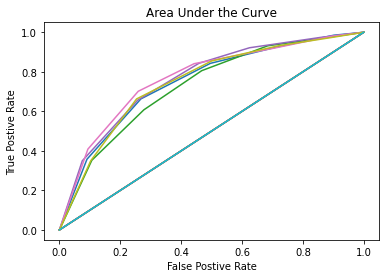

In [147]:
thresholds = list(np.array(list(range(0,105,5)))/100) 
Curves = ROC_Curve(Optimal_Model_Ma, thresholds)
Area_Under_The_Curve = Area_Under_Curve(Curves)
import matplotlib.pyplot as plt
optimal_thresholds = []
for values in Curves:
    roc_curve = pd.DataFrame(Curves[values], columns = ["x","y"])
    j = roc_curve.y - roc_curve.x
    optimal_threshold_roc = np.argmax(j)
    optimal_threshold_ = thresholds[optimal_threshold_roc]
    optimal_thresholds.append(optimal_threshold_)
    plt.plot(roc_curve.x, roc_curve.y) 
    plt.title("Area Under the Curve")
    plt.ylabel('True Postive Rate')
    plt.xlabel('False Postive Rate')
    plt.plot([0,1])

In [148]:
optimal_threshold_value = (np.sum(optimal_thresholds))/5
print("optimal threshold value is " , optimal_threshold_value)

optimal threshold value is  0.56


### Optimal threshold value for the ROC is 0.63

## Compute The AUC Score


22. Compute the AUC score

In [198]:
(Area_Under_Curve(Curves))

[0.7479688283346604,
 0.7282020640956002,
 0.7635218499501311,
 0.7679184746505349,
 0.748055901480559]

## Precision_Recall_Curve

23. Generate the precision-recall curve and determine the optimal threshold.

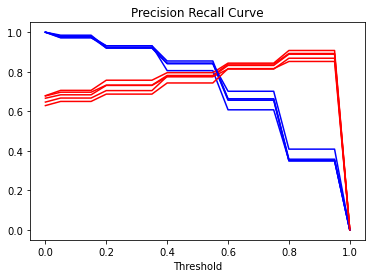

In [194]:
PR_Curve = Precision_Recall_Curve(Optimal_Model_Ma, thresholds)
for values in PR_Curve:
    curve = PR_Curve[values]
    pr_curve = pd.DataFrame(curve, columns = ["Recall","Precision"])
    f = ((( 2 * (pr_curve.Recall * pr_curve.Precision))) / ((pr_curve.Recall + pr_curve.Precision)))
    optimal_recall_curve = (np.argmax(f))/100
    optimal_Precision_recall_curve.append(optimal_recall_curve)
    pr_curve['thresholds'] = thresholds
    plt.plot(pr_curve.thresholds, pr_curve.Recall, 'b') 
    plt.plot(pr_curve.thresholds, pr_curve.Precision, 'r')
    plt.title("Precision Recall Curve")
    plt.xlabel('Threshold')
    

In [196]:
differences = []
optimal_thresholds = []
for x in PR_Curve[0]:
    difference = np.abs(x[0] - x[1])
    differences.append(difference)
for values in differences:
    optimal_threshold = np.argsort(differences)[:5]
    threshold = np.sum((optimal_threshold/20))/5
    optimal_thresholds.append(threshold)

In [197]:
optimal_precision_recall_threshold = (np.sum(optimal_thresholds)/ len(optimal_thresholds))
print("optimal threshold for precision recall curve is", optimal_precision_recall_threshold)

optimal threshold for precision recall curve is 0.58


### The optimal threshold for the precision curve is 0.58

## Classification Error of 95%

24. Calculate and report the 95% confidence interval on the generalization error estimate.

In [202]:
CI_Error_Storage = {}
for values in Optimal_Model_Ma:
    Fold = Optimal_Model_Ma[values]
    y_prob = Fold[2]
    y_test = Fold[1]
    size_of_sample = y_test.shape[0]
    y_prediction = predict_threshold(y_prob, .6) #a is the threshold we decided on last
    accuracy, error = accuracy_and_error(y_prediction, y_test)
    Standard_error = (1.96 *( np.sqrt((error *(1-error))/size_of_sample)))
    CI_lower = np.round((error - Standard_error),4)
    CI_upper = np.round((error + Standard_error),4)
    CI_Error_Storage[values] = CI_lower,CI_upper

|Confidence Interval 95%|Lower Bounds|Upper Bounds|
|:---:|:---:|:---:|
|**Fold 1**| 0.2823| 0.3471 |
|**Fold 2**| 0.3207| 0.3875 |
|**Fold 3**| 0.2835| 0.3485 |
|**Fold 4**| 0.2531| 0.3162 |  
|**Fold 5**| 0.2740| 0.3384 |

In [204]:
CI_Error_Storage

{0: (0.2823, 0.3471),
 1: (0.3207, 0.3875),
 2: (0.2835, 0.3485),
 3: (0.2531, 0.3162),
 4: (0.274, 0.3384)}